# 3 Introduction to Summary Statistics


***
# 3.2 Percentiles, outliers, and box plots
---


As all of you probably now, the median is the special name for the 50th percentile; that is 50% of the data are less than the median. 

Similarly, the 25th percentile is the value of the data point that is greater than 25% of the sorted data, and so on for any other percentile we want.  

<img src="img/ECDF_percentile_ex.png",width=500>

#### ```percentile``` with NumPy
Percertiles are useful summary statistics, and can be computed by calling the function ```np.percentile```. We just pass a list of the percentiles we want, **percentiles, not fractions**, and it returns the data that match those percentiles

```python

In [1]: pd_data = pd.read_csv("data/2008_swing_states.csv")
In [2]: pd_data_PA = pd_data[pd_data['state']=="PA"]
In [3]: dem_share_PA = pd_data_PA["dem_share"].values
    
In [4]: np.percentile( dem_share_PA, [25,50,75])
Out[4]: array([ 37.3025,  43.185 ,  49.925])
    
```

We now have three summary statistics. The hole point of summary statistics was to keep things concise, but we are starting to get a lot of numbers here.

### 2.1 Box plots: interquartile range (IQR)

<font color=red> Dealing with this issue is where quantitative EDA meets graphical EDA. Box plots were invented by John Tukey himself to display some of the salient features of a data set based on percentiles.
</font>

<img src="img/box_plot_percentile_ex.png",width=450>

Here we see a box pot showing Obama's vote share from states east and west of Mississipi River. 
- The center of the box is the median, which we know is the percentile of the data
- The edges of the box are the 25th and 75th percentile
- The total height of the box contains the middle 50% of the data, and is called the **interquartile range**, or **IQR**
- The whiskers extend a distance of $$1.5\times IQR$$ or to the extent of the data, whichever is less extreme
- Finally, any points outside of the whiskers are plotted as individual points, **which we often demarcate as outliers**


#### Common Outlier Criterion
While there is no single definition for an outlier, **being more than 2 IQRs away from the median** is a common criterion.

It is important to remember that **an outlier is not necessarily an erroneous data point**. You should not assume an outlier is erroneous unless you have some known reason to.

In this example, since there is zero evidence of any substantial voter fraud in the United States in 2008 elections, these outliers are not erroneous. They are just data points with extreme values.

When the number of data are very large and bee swarm plots are too cluttered, as the one we shown in last section

<img src="img/beeswarm_limitation_ex.png",width=400>

box plots are a great alternative. It makes sense, then, that constructing a box plot using ```seaborn``` is exactly the same as making a bee swarm plot. 

### Generating a box plot: percentiles
We just call the function ```sns.boxplot()``` with arguments the values for x and y-axis:
```python
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

east_west = pd_data['east_west'].values
dem_share = pd_data['dem_share'].values

_ = sns.boxplot( x= east_west, y=dem_share)
_ = plt.xlabel('region')
_ = plt.ylabel('percent of vote for Obama')
plt.show()
```
#### Instructions
> - Copy these code and see the resulting **box plot** with its percentiles, all in one plot!

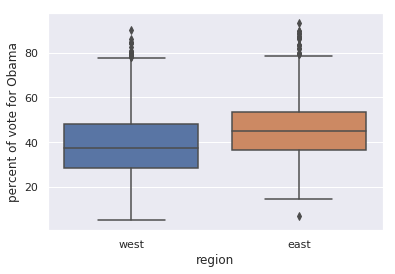

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()


import pandas as pd

pd_data = pd.read_csv("data/2008_all_states.csv")


east_west = pd_data['east_west'].values
dem_share = pd_data['dem_share'].values

_ = sns.boxplot( x= east_west, y=dem_share)
_ = plt.xlabel('region')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

# Let's practice!
***

<div class="alert alert-block alert-success">
<b>Data Set.</b> In the following ipython cell, the necessary data set for this section is loaded
</div>

In [5]:
# all packages are already loaded
# import numpy as np
# from matplotlib import pyplot as plt
# import seaborn as sns
# sns.set()

# Loading data in the namespace
# columns info: row,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm),species
iris = np.genfromtxt( "data/iris.csv", delimiter=",", skip_header=1)

# Select features for the versicolor type of iris
# species info: 
#       0 for versicolor
#       1 for setosa
#       2 for virginica
versicolor = iris[:,5]== 0
versicolor_petal_length = iris[versicolor,1]

setosa = iris[:,5]== 1
setosa_petal_length = iris[setosa,1]

virginica = iris[:,5]== 2
virginica_petal_length = iris[virginica,1]

<font color=green>
# Exercise 2.1 Computing percentiles with NumPy
</font>
In this exercise, you will compute the percentiles of petal length of Iris versicolor.

#### Instructions
> - Create percentiles, a NumPy array of percentiles you want to compute. These are the 2.5th, 25th, 50th, 75th, and 97.5th. You can do so by creating a list containing these ints/floats and convert the list to a NumPy array using np.array(). For example, np.array([30, 50]) would create an array consisting of the 30th and 50th percentiles.
> - Use np.percentile() to compute the percentiles of the petal lengths from the Iris versicolor samples. The variable versicolor_petal_length is in your namespace.
> - Print the percentiles.

In [6]:
import numpy as np

# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
percentiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print "\n\t The percentiles {0} for the petal length of the versicolor iris are {1}, respectively".format(
    percentiles, percentiles_vers)


	 The percentiles [  2.5  25.   50.   75.   97.5] for the petal length of the versicolor iris are [ 4.4  4.8  5.   5.2  5.7], respectively


<font color=green>
# Exercise 2.2 Comparing percentiles to ECDF
</font>
To see how the percentiles relate to the ECDF, you will plot the percentiles of Iris versicolor petal lengths you calculated in the last exercise on the ECDF plot you generated in the previous section. 

Note that to ensure the Y-axis of the ECDF plot remains between 0 and 1, you will need to rescale the percentiles array accordingly - in this case, dividing it by 100.

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / float(n)

    return x, y


#### Instructions
> - Use the function ```ecdf()``` to compute the x and y axis, to plot the ECDF for the petal length of the Versatoil Iris specie
> - Add the percentiles to the plot: the percentiles as red diamonds on the ECDF. Pass the x and y coordinates: percentiles_vers and percentiles/100 - as positional arguments; and specify the marker='D', color='red' and linestyle='none' keyword arguments.
> - Display the plot.
**Do not forget to label the axes!**

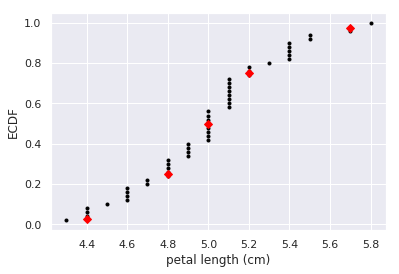

In [8]:
x_vers, y_vers = ecdf(versicolor_petal_length)

# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.', color="black")
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(percentiles_vers, percentiles/100, marker='D', color='red', linestyle="none")

# Show the plot
plt.show()

<font color=green>
# Exercise 2.3 Box-and-whisker plot
</font>
Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine. However, it is always good to get some practice. Make a box plot of the **iris petal lengths**. You have a ndarray ```iris```, which contains the petal length data (2nd column), in your namespace. 

Go to **Exercise 1.1** and inspect the data to make sure you know what the pertinent columns are.

For your reference, the code used to produce the box plot in the previous sections is provided below:

```python
east_west = pd_data['east_west'].values
dem_share = pd_data['dem_share'].values

_ = sns.boxplot( x= east_west, y=dem_share)
_ = plt.xlabel('region')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

```

In the IPython cell, you can use sns.boxplot? or help(sns.boxplot) for more details on how to make box plots using ```seaborn```.

#### Instructions
> - The set-up is exactly the same as for the bee swarm plot; you just call sns.boxplot() with the same keyword arguments as you would sns.swarmplot(). The x-axis is 'species' and y-axis is 'petal length (cm)'.
> - Don't forget to label your axes!
> - Display the figure using the normal call.



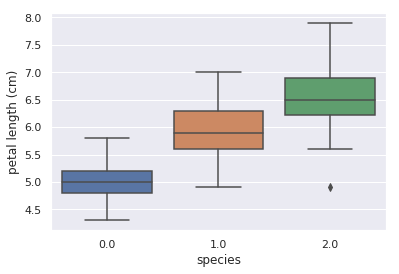

In [9]:
# Create box plot with Seaborn's default settings
sns.set()
_ = sns.boxplot(x=iris[:,5], y=iris[:,1])

# Label the axes
_ = plt.xlabel("species")
_ = plt.ylabel("petal length (cm)")

# Show the plot
plt.show()